# Поиск ассоциативных правил
## Ращупкин ЕВ КЭ-120
### Задание:
    Выполните поиск ассоциативных правил для набора данных из задания по поиску частых наборов. Зафиксируйте значение пороговое значение поддержки (например, 10%), варьируйте пороговое значение достоверности (например, от 70% до 95% с шагом 5%). 
        Получите список результирующих правил в удобочитаемом виде (антецедент==>консеквент). 
        Отфильтруйте правила, в которых антецедент и консеквент суммарно включают в себя не более семи объектов.
        Проанализируйте и изложите содержательный смысл полученного результата.
    Выполните визуализацию полученных результатов в виде следующих диаграмм:
        сравнение быстродействия поиска правил на фиксированном наборе данных при изменяемом пороге достоверности; 
        общее количество найденных правил на фиксированном наборе данных при изменяемом пороге достоверности; 
        максимальное количество объектов в правиле на фиксированном наборе данных при изменяемом пороге достоверности; 
        количество правил, в которых антецедент и консеквент суммарно включают в себя не более семи объектов, на фиксированном наборе данных при изменяемом пороге достоверности.
    Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами:  
        формулировка задания; 
        гиперссылка на каталог репозитория с исходными текстами, набором данных и др. сопутствующими материалами;
        рисунки с результатами визуализации; 
        пояснения, раскрывающие смысл полученных результатов.

In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
# Список частых наборов, в которых 6 объектов 50 транзакций 
dataset = [
    ["молоко", "хлеб", "яйца", "соль"],
    ["молоко", "хлеб"],
    ["хлеб", "яйца", "соль"],
    ["молоко", "яйца", "соль"],
    ["молоко", "хлеб", "яйца", "масло", "соль"],
    ["хлеб", "масло"],
    ["молоко", "яйца", "масло", "хлеб"],
    ["хлеб", "яйца", "масло", "соль"],
    ["молоко", "хлеб", "масло"],
    ["яйца", "масло", "соль"],
    ["молоко", "хлеб", "яйца"],
    ["хлеб", "сахар"],
    ["молоко", "хлеб", "масло"],
    ["яйца", "молоко"],
    ["молоко", "хлеб", "яйца"],
    ["молоко", "соль", "сахар"],
    ["хлеб", "яйца", "масло", "сахар"],
    ["молоко", "масло", "соль"],
    ["яйца", "хлеб", "соль"],
    ["молоко", "хлеб", "яйца", "масло"],
    ["хлеб", "яйца"],
    ["молоко", "сахар"],
    ["масло", "соль"],
    ["молоко", "хлеб", "яйца", "соль", "сахар"],
    ["хлеб", "яйца", "масло", "молоко"],
    ["молоко", "хлеб", "соль"],
    ["яйца", "масло", "хлеб"],
    ["молоко", "яйца", "сахар"],
    ["хлеб", "масло", "соль"],
    ["молоко", "яйца", "хлеб", "соль"],
    ["хлеб", "яйца", "сахар"],
    ["молоко", "масло", "яйца"],
    ["хлеб", "соль", "сахар"],
    ["молоко", "яйца", "масло", "соль"],
    ["хлеб", "яйца", "масло"],
    ["молоко", "хлеб", "соль"],
    ["яйца", "масло", "сахар"],
    ["молоко", "хлеб", "яйца", "масло"],
    ["хлеб", "яйца", "соль"],
    ["молоко", "масло", "соль"],
    ["яйца", "хлеб", "сахар"],
    ["молоко", "хлеб", "яйца"],
    ["хлеб", "масло", "соль"],
    ["молоко", "яйца", "соль"],
    ["хлеб", "яйца", "масло"],
    ["молоко", "хлеб", "соль", "сахар"],
    ["яйца", "масло", "хлеб"],
    ["молоко", "хлеб", "яйца", "масло"],
    ["хлеб", "яйца", "соль"],
    ["молоко", "масло", "сахар"],
    ["яйца", "хлеб", "соль"],
]

# Подготовка данных для mlxtend
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [4]:
# Параметры эксперимента
min_support = 0.1
confidence_levels = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85]
results = []

# Поиск частых наборов
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

# Перебор порогов достоверности
for confidence in confidence_levels:
    start_time = time.time()
    
    # Генерация правил
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    
    # Фильтрация по длине
    rules['length'] = rules['antecedents'].apply(lambda x: len(x)) + rules['consequents'].apply(lambda x: len(x))
    filtered_rules = rules[rules['length'] <= 7]
    
    # Сохранение результатов
    elapsed_time = time.time() - start_time
    results.append({
        'confidence': confidence,
        'time': elapsed_time,
        'total_rules': len(rules),
        'filtered_rules': len(filtered_rules),
        'max_length': rules['length'].max() if not rules.empty else 0
    })
    
    # Вывод правил
    print(f"\nПравила при достоверности {confidence*100}%:")
    display_rules = filtered_rules.copy()
    display_rules['antecedents'] = display_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    display_rules['consequents'] = display_rules['consequents'].apply(lambda x: ', '.join(list(x)))
    print(display_rules[['antecedents', 'consequents', 'support', 'confidence']].to_string(index=False))


Правила при достоверности 50.0%:
        antecedents consequents  support  confidence
              масло      молоко 0.254902    0.520000
              масло        хлеб 0.333333    0.680000
              масло        яйца 0.313725    0.640000
              сахар      молоко 0.117647    0.500000
               соль      молоко 0.254902    0.541667
             молоко        хлеб 0.352941    0.620690
             молоко        яйца 0.352941    0.620690
               яйца      молоко 0.352941    0.529412
              сахар        хлеб 0.137255    0.583333
              сахар        яйца 0.117647    0.500000
               соль        хлеб 0.313725    0.666667
               соль        яйца 0.274510    0.583333
               яйца        хлеб 0.509804    0.764706
               хлеб        яйца 0.509804    0.702703
      масло, молоко        хлеб 0.156863    0.615385
      масло, молоко        яйца 0.156863    0.615385
        масло, яйца      молоко 0.156863    0.500000
        масл

При достоверности 70% и выше выделяются правила, связанные с яйцами и хлебом, где яйца часто покупаются вместе с хлебом (достоверность 76.47%). Также масло и яйца образуют сильную ассоциацию с хлебом (достоверность 75%).
С увеличением уровня достоверности наблюдается значительное сокращение числа правил. При достоверности 80% и 85% не было найдено ни одного правила, что указывает на то, что более строгие критерии отсекают менее надежные ассоциации.
Некоторые комбинации, такие как "масло, молоко, хлеб" и "масло, молоко, яйца", показывают уверенные ассоциации с хлебом и яйцами.

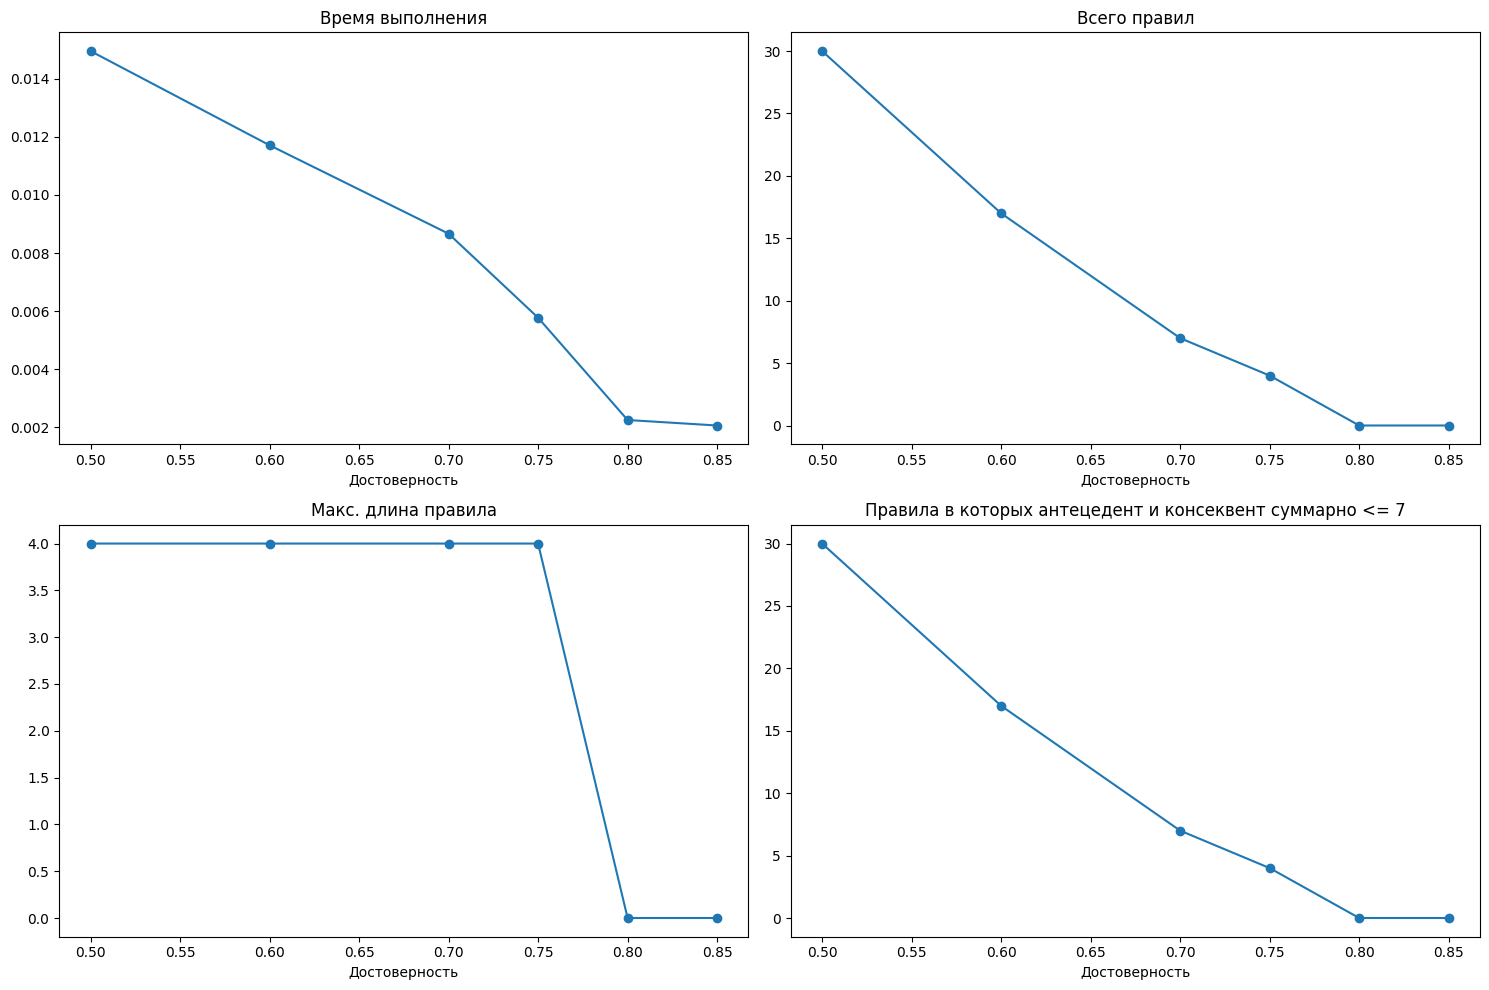

In [8]:
# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Время выполнения
axes[0, 0].plot([res['confidence'] for res in results], [res['time'] for res in results], marker='o')
axes[0, 0].set_title('Время выполнения')
axes[0, 0].set_xlabel('Достоверность')

# Общее количество правил
axes[0, 1].plot([res['confidence'] for res in results], [res['total_rules'] for res in results], marker='o')
axes[0, 1].set_title('Всего правил')
axes[0, 1].set_xlabel('Достоверность')

# Максимальная длина
axes[1, 0].plot([res['confidence'] for res in results], [res['max_length'] for res in results], marker='o')
axes[1, 0].set_title('Макс. длина правила')
axes[1, 0].set_xlabel('Достоверность')

# Отфильтрованные правила
axes[1, 1].plot([res['confidence'] for res in results], [res['filtered_rules'] for res in results], marker='o')
axes[1, 1].set_title('Правила в которых антецедент и консеквент суммарно <= 7')
axes[1, 1].set_xlabel('Достоверность')

plt.tight_layout()
plt.show()

При увеличении значения достоверности уменьшается время выполнения алгоритма, уменьшается количество правил, при этом оно не отличается от результата в которых антецедент и консеквент суммарно включают в себя не более семи объектов. При этом Максимальная длина правила остается неизменной до момента полного отсечения при высоком пороге достоверности.